# Prb Statement - Predicting the voice is of a male or a female .

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Encoding the target variable

In [68]:
df['Target'] = np.where(df['label']=='male',0,1)  # Male->0 Female->1

In [69]:
df.drop(['label'],axis=1,inplace=True)

In [70]:
df.shape

(3168, 21)

# Seperating X and Y

In [71]:
X = df.drop(['Target'],axis=1)

In [72]:
Y= df['Target']

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

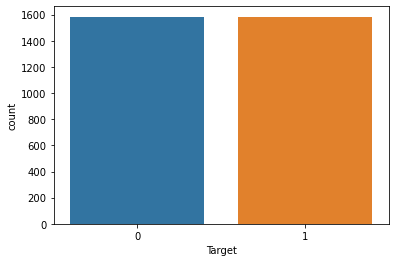

In [73]:
sns.countplot(Y) 
# Count of male and Female is same

# Checking data Types of the features

In [74]:
X.dtypes          # All numeric data 

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
dtype: object

# Checking for null or missing value

In [75]:
X.isnull().sum()           # No Missing Value

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
dtype: int64

# Checking for outliers

In [76]:
X.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
1%,0.097530,0.028289,0.069919,0.012142,0.158980,0.020206,0.820166,2.974988,0.786073,0.117723,0.000000,0.097530,0.076627,0.013305,0.141346,0.007812,0.004883,0.007812,0.000000,0.000000
5%,0.125968,0.031617,0.116355,0.043580,0.187414,0.025487,1.122956,3.755363,0.816751,0.158445,0.000000,0.125968,0.093627,0.015795,0.192470,0.104490,0.007812,0.312500,0.265625,0.057750
10%,0.141147,0.033959,0.134016,0.075085,0.196284,0.029305,1.299402,4.292988,0.832234,0.188313,0.016287,0.141147,0.101598,0.016129,0.219178,0.188817,0.007812,0.609375,0.560742,0.073649
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183


In [77]:
def clipping(x):
    x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    return x

In [78]:
X=X.apply(lambda x : clipping(x))   

In [79]:
X.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.181044,0.057068,0.185769,0.140473,0.225016,0.084054,3.116024,34.942753,0.895250,0.408221,0.165265,0.181044,0.142780,0.036426,0.258988,0.827038,0.052306,5.015303,4.961175,0.172696
std,0.029303,0.016412,0.035465,0.048364,0.022486,0.041954,4.076442,123.167572,0.044523,0.176765,0.077179,0.029303,0.031965,0.017176,0.029441,0.518743,0.061915,3.402418,3.396666,0.114566
min,0.097530,0.028289,0.069919,0.012142,0.158980,0.020206,0.820166,2.974988,0.786073,0.117723,0.000000,0.097530,0.076627,0.013305,0.141346,0.007812,0.004883,0.007812,0.000000,0.000000
1%,0.097551,0.028303,0.070015,0.012223,0.159229,0.020219,0.822052,2.977103,0.786098,0.117809,0.000000,0.097551,0.076701,0.013348,0.141511,0.007812,0.004883,0.007812,0.000000,0.000000
5%,0.125968,0.031617,0.116355,0.043580,0.187414,0.025487,1.122956,3.755363,0.816751,0.158445,0.000000,0.125968,0.093627,0.015795,0.192470,0.104490,0.007812,0.312500,0.265625,0.057750
10%,0.141147,0.033959,0.134016,0.075085,0.196284,0.029305,1.299402,4.292988,0.832234,0.188313,0.016287,0.141147,0.101598,0.016129,0.219178,0.188817,0.007812,0.609375,0.560742,0.073649
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183


# Removing Zero Variance Columns

In [80]:
from sklearn.feature_selection import VarianceThreshold

var = VarianceThreshold(threshold=0)
var.fit_transform(X)
cols = var.get_support(indices=True)

# Scaling the data 

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Modelling

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Using gridserach cv to tune the hyperparameter

In [122]:
from sklearn.model_selection import GridSearchCV
model=SVC()

In [106]:
param = {'C': (np.arange(0.1,1,0.1)),
        'gamma': [0.01,0.02,0.03,0.04,0.05],
        'kernel': ['linear','rbf','poly'],
        'degree': [2,3,4]
        }

cv_svm = GridSearchCV(model, cv = 10, param_grid = param, n_jobs = 3)

cv_svm.fit(X_train, y_train)
print('Best Parameters using grid search: \n', cv_svm.best_params_)

Best Parameters using grid search: 
 {'C': 0.6, 'degree': 2, 'gamma': 0.05, 'kernel': 'rbf'}


In [123]:
model.set_params(C = 0.6, gamma= 0.05, kernel= 'rbf' ,degree= 2)

SVC(C=0.6, degree=2, gamma=0.05)

In [124]:
model.fit(X_train, y_train)

SVC(C=0.6, degree=2, gamma=0.05)

In [125]:
voice_predicted = svc.predict(X_test)

In [110]:
print("Accuracy of testing data--->",metrics.accuracy_score(y_test, voice_predicted))
print("Precision--->",metrics.precision_score(y_test, voice_predicted))
print("Recall--->",metrics.recall_score(y_test, voice_predicted))
print("f1_score--->",metrics.f1_score(y_test, voice_predicted))

Accuracy of testing data---> 0.9779179810725552
Precision---> 0.9744408945686901
Recall---> 0.9807073954983923
f1_score---> 0.9775641025641026


# Area Under the Curve

In [126]:
from sklearn.metrics import roc_curve, auc
fpr, tpr,_= roc_curve(y_test, voice_predicted)
roc_auc= auc(fpr, tpr)

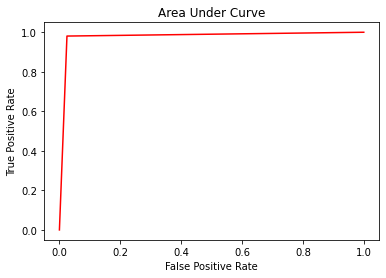

In [127]:
plt.plot(fpr, tpr, color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.show()

# Confusion metrics

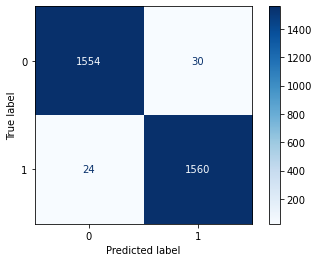

In [128]:
from sklearn.metrics import confusion_matrix
metrics.plot_confusion_matrix(model,X,Y,cmap='Blues')

# Classification Report

In [129]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = voice_predicted
target_names = ['Male', 'Female']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Male       0.98      0.98      0.98       323
      Female       0.97      0.98      0.98       311

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

